<a href="https://colab.research.google.com/github/eojin1978/jeju_master/blob/main/3%EC%9D%BC%EC%B0%A8_%EC%9B%B9%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_01_%EC%BD%94%EB%9E%A9_OpenAPI%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91_%EC%8B%A4%EC%8A%B5%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹 데이터 분석

## 1. OpenAPI를 이용한 데이터 수집

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 한글 폰트 지정하기

In [10]:
import matplotlib.pyplot as plt
#(Mac한글 폰트 지정하기)
plt.rcParams['font.family'] = 'NanumBarunGothic'

#(windows)한글 폰트 지정하기
# plt.rcParams['font.family'] = 'Malgun Gothic'

---

### 01.웹 크롤링의 이해
- **웹 크롤링(Web Crawling)**: 웹 페이지로부터 원하는 정보를 추출하는 기법, 보통 여러 페이지 탐색하는 방법,
- **웹 스크래핑(Web Scraping)**: 특정한 하나의 웹 페이지를 탐색하는 방법
- **웹 크롤링과 웹 스크래핑의  방법이 동일하여 보통 웹 크롤링이라고 통칭해서 부른다.**

In [18]:
#웹 요청 동작 원리
import requests

requests.get("https://google.com")
#정상적으로 동작이 되면 코드 200이 응답(Response)이 온다.

<Response [200]>

In [19]:
import requests

response = requests.get("https://google.com")

# 응답 상태
print('#응답 상태: ', response.status_code)

# 응답 바이너리 원문
print('#응답 바이너리 원문: ', response.content)

# 응답 UTF-8로 인코딩된 문자열
print('#응답 UTF-8로 인코딩된 문자열: ', response.text)

# 응답 헤더
print('#응답 헤더: ', response.headers)

# 응답 헤더: 콘텐트 유형
print('#응답 헤더유형: ', response.headers['Content-Type'])

#응답 상태:  200
#응답 바이너리 원문:  b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2023/halloween-2023-6753651837109958.2-l.png" itemprop="image"><meta content="Halloween 2023" property="twitter:title"><meta content="Happy Halloween! #GoogleDoodle" property="twitter:description"><meta content="Happy Halloween! #GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2023/halloween-2023-6753651837109958-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/do

---------------------

## 02.네이버 OpenAPI 사용하기

### # 1.네이버 OpenAPI 신청하기 : 네이버 **검색(책, 뉴스, 쇼핑)

- 네이버 OpenAPI 소개: https://developers.naver.com/products/intro/plan/
- 개발 가이드 보기: https://developers.naver.com/docs/serviceapi/search/news
- OpenAPI 신청하기: https://developers.naver.com/apps/#/register

In [37]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = 'QGG_VZDK7uf3TDQicJtn'  # 자신의 client_id
client_pw = 'H71ccUJmml'            # 자신의 client_secret
PATH = './sample_data'              # 수집 데이터 저장 폴더


#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:                 #웹상에서 검색시 완료면 200, 아니면 모두 오류임
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    print(f'url = {url}')
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):
    if node == 'book':
        data = {'제목':post['title'],
                '저자':post['author'],
                '출판사':post['publisher'],
                '출간일':post['pubdate'],
                '링크':post['link'],
                '이미지':post['image']}
    elif node == 'news':
        data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}
    elif node == 'shop':
        data = {'제목':post['title'],
                '브랜드':post['brand'],
                '제조사':post['maker'],
                '가격':post['lprice'],
                '이미지':post['image']}

    jsonResult.append(data)
    datas.append(data)

    return

#[CODE 0]
def main():
    global node, srcText

    nodeType = '''-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------'''
    print(nodeType)
    node = input('번호를 선택하세요.')
    if node == '1': node = 'book'
    elif node == '2': node = 'news'
    elif node == '3': node = 'shop'

    srcText = input(f'[{node} 분류에서] 검색할 키워드를 입력하세요: ')

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, srcText, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, srcText, start, total)
#     print(f'가져올 데이터 : {total} 건')

    with open(f'{PATH}/naver_{node}_{srcText}', 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))



    # csv 파일로 저장하기
    file = f'{PATH}/naver_{node}_{srcText}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'{PATH}/naver_{node}_{srcText}.csv SAVED')
    return df

#-----------
# 시작
#-----------
df = main()
df

-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------
번호를 선택하세요.2
[news 분류에서] 검색할 키워드를 입력하세요: 제주여행
url = https://openapi.naver.com/v1/search/news.json?query=%EC%A0%9C%EC%A3%BC%EC%97%AC%ED%96%89&start=1&display=100
[2023년11월01일 02시51분49초] Url Request Success
url = https://openapi.naver.com/v1/search/news.json?query=%EC%A0%9C%EC%A3%BC%EC%97%AC%ED%96%89&start=101&display=473504
HTTP Error 400: Bad Request
[2023년11월01일 02시51분49초] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%A0%9C%EC%A3%BC%EC%97%AC%ED%96%89&start=101&display=473504
가져온 데이터 : 100 건
./sample_data/naver_news_제주여행.csv SAVED


,제목,링크,내용
0,"<b>제주</b> 드림타워 복합리조트, 10월 카지노 순매출 198억원으로 역대 두번째",https://www.starnewskorea.com/stview.php?no=20...,오는 3일 <b>제주</b> 정저우 노선을 시작으로 6년10개월 만에 본격 재개되는...
1,"롯데관광개발 <b>제주</b> 드림타워 복합리조트, 10월 카지노 순매출 198억 ...",https://www.sedaily.com/NewsView/29X2E7AW1Q,롯데관광개발은 “진짜 랠리는 지금부터”라며 “11월 3일 <b>제주</b> 정저우 ...
2,"<b>제주</b> 드림타워 복합리조트, 10월 카지노 순매출 198억원···역대 두번째",http://www.fnnews.com/news/202311011048345440,롯데관광개발 관계자는 &quot;오는 3일 <b>제주</b> 정저우 노선을 시작으로...
3,"<b>제주</b>은행, 롯데멤버스와 L.POINT 적립 프로모션 진행",http://www.newsjeju.net/news/articleView.html?...,"<b>여행</b>]롯데호텔, 롯데리조트, 롯데렌트카, 그린카, 롯데월드 등 ▲[쇼핑..."
4,"<b>제주</b>안전체험관, 개관 3주년 맞이해 기념행사 '항공특별체험도'",http://www.mediajeju.com/news/articleView.html...,가을철 관광<b>여행</b> 수요 증가에 따른 안전사고를 대비해 <b>제주</b>항...
...,...,...,...
95,"장애물 없는 생활환경, 공동체 인식과 제도의 양바퀴",http://www.mediajeju.com/news/articleView.html...,얼마 전 대만 <b>여행</b> 때 타이페이에서 보행을 하는 인도 상황을 관심을 가...
96,"대한항공, 일반·연구직 ‘세자릿수 공채’…항공업계 채용 훈풍 분다",http://news.heraldcorp.com/view.php?ud=2023103...,해외<b>여행</b>에 결격사유가 없다면 지원할 수 있다. 내년 3월 입사가 목표다...
97,여수시 &quot;대한항공 취항 재개 환영&quot;,https://www.smartfn.co.kr/article/view/sfn2023...,정기명 여수시장은 이날 축사를 통해 “해외<b>여행</b> 활성화에 따른 국내 관광...
98,&quot;오직 겨울에만 즐겨요&quot;...호텔 미식 프로모션 소개,https://www.slist.kr/news/articleView.html?idx...,사진=<b>제주</b>신라호텔 <b>제주</b>신라호텔이 미식 <b>여행</b>을 ...


### # 2.네이버 OpenAPI 사용 예 : 책 검색

In [22]:
import urllib.request
import json
# 네이버 애플리케이션 등록 정보
client_id = 'QGG_VZDK7uf3TDQicJtn'  # 자신의 client_id
client_pw = 'H71ccUJmml'            # 자신의 client_secret

# 검색어 입력
title = input("검색 도서명: ")
# url설정
url = "https://openapi.naver.com/v1/search/book.json"
query = "?query="+urllib.parse.quote(title)
option = "&display=10&start=1" # 10개씩&가져올 페이지 지정
url_query = url + query + option
print(f'url_query = {url_query}')

#Open API 검색 요청 개체 설정
request = urllib.request.Request(url_query)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_pw)

# 검색 요청 및 처리
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode == 200):
    result = response.read().decode('utf-8')
else:
    print("검색에 실패하였습니다.")
    exit()
# 검색 결과 parsing 해서 보기좋게 출력하기
books = json.loads(result) #검색 결과를 json타입으로 보여주기
if books == None:
    print("json.loads 실패하였습니다.")
    exit()

# books 결과 중 도서 정보가 담긴 items 항목의 내용을 parsing한다.
for book in books['items']:
    print(f"제목: {book['title']}")
    print(f"저자: {book['author']}")
    print(f"URL: {book['link']}")
    print()

검색 도서명: 간편요리
url_query = https://openapi.naver.com/v1/search/book.json?query=%EA%B0%84%ED%8E%B8%EC%9A%94%EB%A6%AC&display=10&start=1
제목: 후다닥 간편요리
저자: 주부생활 편집부
URL: https://search.shopping.naver.com/book/catalog/32441024855

제목: 후다닥 쌤의 후다닥 간편 요리 (후다닥의 쉽고 맛있는 집밥 레시피 103)
저자: 김연정
URL: https://search.shopping.naver.com/book/catalog/32444883982

제목: 간편 일품요리 (다양하게 즐기는 72가지 생활 요리)
저자: 김미란
URL: https://search.shopping.naver.com/book/catalog/32510361965

제목: 세상 편한 집밥 (박미란 고수에게 배우는 가정간편식 응용요리)
저자: 박미란
URL: https://search.shopping.naver.com/book/catalog/32436088649

제목: 15분이면 뚝딱! 와인 안주 요리 (편의점, 배달 음식, 간편식을 활용한 와인 100배 즐기기)
저자: 최주리
URL: https://search.shopping.naver.com/book/catalog/32466663728

제목: 진짜 캠핑 요리 (버너 하나로 간편하게 만드는 베스트 캠핑 레시피 140)
저자: 이미경
URL: https://search.shopping.naver.com/book/catalog/32438164718

제목: 끼니 (싱글족을 위한 간편 밥상)
저자: 박용일
URL: https://search.shopping.naver.com/book/catalog/32466668998

제목: 한식양념장 (한식양념장으로 간편하게 조리하기)
저자: 
URL: https://search.shopping.naver.com/book/catalog/32455

### [실습] : 네이버 검색 API 사용하여 데이터 수집하기

#### 라이브러리 설치하기

In [11]:
# 정적 크롤링을 위한 requests 설치
!pip install requests



---



### [실습] :  네이버 Papago API 사용하여 번역하기

In [26]:
import os
import sys
import urllib.request
import datetime
import json


# client_id = 'QGG_VZDK7uf3TDQicJtn'  # 자신의 파파고 NMT API ID
# client_pw = 'H71ccUJmml'            # 자신의 파파고 NMT API PASSWORD

news = []   #csv파일을 위한 변수

#[CODE 1]
def papago(prompt, lang=1):

    encText = urllib.parse.quote(prompt)
    if lang == 1 :
        data = "source=ko&target=en&text=" + encText
    else:
        data = "source=en&target=ko&text=" + encText
    url = "https://openapi.naver.com/v1/papago/n2mt"

    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req, data=data.encode("utf-8") )
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            responseDecode = response.read().decode('utf-8')

            if responseDecode == None:
                return None
            else:
                return json.loads(responseDecode)

    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

# 메인
lang= int(input('[선택] 1:한글->영어, 2:영어->한글: '))
txt =  '한글' if lang==1 else '영어'   #아래의 if문 4줄을 한줄로 간략하게 표현하는 방법
# if long == 1:
#     txt = '한글'
# else:
#     txt = '영어'
prompt= input(f'[번역] 변환할 문장을 입력하세요.[{txt}로 입력]: ')

jsonResponse = papago(prompt, lang)  # 파파고 번역
jsonResponse
print('-'*50)
print(f"[번역 결과] => {jsonResponse['message']['result']['translatedText']}")


[선택] 1:한글->영어, 2:영어->한글: 2
[번역] 변환할 문장을 입력하세요.[영어로 입력]: What should I eat for lunch today?
[2023년11월01일 01시54분39초] Url Request Success
--------------------------------------------------
[번역 결과] => 오늘 점심은 무엇을 먹을까요?


-------------------------

### 한글 텍스트 Cleansing

#### 라이브러리 설치

In [27]:
# 자연어처리 형태소 분석 및 토큰화
!pip install nltk

In [28]:
# (한글)자연어처리 형태소 분석 및 토큰화
# (WinOS에서는 konlpy를 사용하기 위해 JDK를 설치해야 오류가 없어 코랩에서 실행함)
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 28.4 MB/s eta 0:00:00


In [29]:
# html tag parsing을 위한 라이브러리
!pip install beautifulsoup4

#### 한글 테스트 자연어 처리(Text Cleansing)

In [38]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import konlpy
import nltk

def clean_korean_documents(documents):
    #텍스트 정제 (HTML 태그 제거)
    for i, document in enumerate(documents):
        document = BeautifulSoup(document, 'html.parser').text
        documents[i] = document

    #텍스트 정제 (특수기호 제거)
    for i, document in enumerate(documents):
        document = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', document) #특수기호 제거, 정규 표현식
        documents[i] = document

    #텍스트 정제 (형태소 분석)
    for i, document in enumerate(documents):
        okt = konlpy.tag.Okt()
        clean_words = []
        for word in okt.pos(document, stem=True): #어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
                clean_words.append(word[0])
        document = ' '.join(clean_words)
        documents[i] = document

    #텍스트 정제 (불용어 제거)
    df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
    df[0] = df[0].apply(lambda x: x.strip())
    stopwords = df[0].to_numpy()
    nltk.download('punkt')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            if word not in stopwords: #불용어 제거
                clean_words.append(word)
        documents[i] = ' '.join(clean_words)

    return documents


def clean_target_feature(data):
    x_data = data.to_list()
    return clean_korean_documents(x_data)



# ---------------------
# 1.클린징할 파일 가져오기
file = f'{PATH}/naver_{node}_{srcText}.csv'
df = pd.read_csv(file)

# 2.클린징할 컬럼 선택해서 클린징하기
# (앞 OpenAPI검색에서 2.news 검색을 한 후 실행하기)
df['제목'] = clean_target_feature(df['제목'])  # 기사 제목
df['내용'] = clean_target_feature(df['내용'])  # 기사 내용

# 3.클린징 결과 csv 파일로 저장하기
file = f'{PATH}/naver_{node}_{srcText}_clean.csv'
df.to_csv(file, index=False, encoding="utf-8-sig")
print(f'{file} SAVED')

df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


./sample_data/naver_news_제주여행_clean.csv SAVED


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,제목,링크,내용
0,제주 드림 타워 복합 리조트 카지노 매출 억원 역대 두번째,https://www.starnewskorea.com/stview.php?no=20...,오다 제주 정저우 노선 시작 본격 재개 되다 중국 단체 관광객 특수 대한 대감 행업...
1,롯데 관광 개발 제주 드림 타워 복합 리조트 카지노 매출 억 역대,https://www.sedaily.com/NewsView/29X2E7AW1Q,롯데 관광 개발 진짜 랠리 라며 제주 정저우 노선 재개 시작 중국 단체 관광객 본격...
2,제주 드림 타워 복합 리조트 카지노 매출 억원 역대 두번째,http://www.fnnews.com/news/202311011048345440,롯데 관광 개발 관계자 오다 제주 정저우 노선 시작 개월 본격 재개 되다 중국 단체...
3,제주 은행 롯데 메다 버스 적립 프로모션 진행,http://www.newsjeju.net/news/articleView.html?...,여행 롯데 호텔 롯데 리조트 롯데 렌트카 그린 카 롯데 월드 쇼핑 롯데 마트 롯데 ...
4,제주 안전 체험 관 개관 주년 맞이 하다 기념 행사 항공 특별 체험,http://www.mediajeju.com/news/articleView.html...,가을 철 관광 여행 수요 증가 따르다 안전 사고 대비 하다 제주항공 계 되다 항공 ...
...,...,...,...
95,장애물 없다 생활환경 공동체 인식 제도 바퀴,http://www.mediajeju.com/news/articleView.html...,얼마 전 대만 여행 타이페이 보행 하다 인도 상황 관심 살펴보다 대부분 인도 제주도...
96,대한항공 구직 자릿수 공채 항공 업계 채용 훈풍 분다,http://news.heraldcorp.com/view.php?ud=2023103...,해외여행 결격 사유 없다 지원 하다 있다 내년 입사 목표 이번 대한항공 신규 채용 ...
97,여수시 대한항공 취항 재개 환영,https://www.smartfn.co.kr/article/view/sfn2023...,정기 여수시 날 축사 통해 해외여행 활성화 따르다 국내 관광 수요 급감 여수 제주 ...
98,오직 겨울 즐기다 호텔 미식 프로모션 소개,https://www.slist.kr/news/articleView.html?idx...,사진 제주 신라 호텔 신라 호텔 미식 여행 테마 한정 런치 메뉴 포함 되다 패키지 ...


### 텍스트 빈도수로 워드 클라우드 만들기

- **사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출**
- **단, 한글에서 불용어 처리 및 가중치 처리 등 자연어 텍스트 전처리에 필요한 여러 가지 방법은 여기서 다루지 않는다.**

#### 라이브러리 설치

In [34]:
!pip install scikit-learn

#### 기사 제목을 토큰화 하고 빈도수 출력하기

[('제주', 31), ('여행', 15), ('하다', 14), ('드림', 12), ('타워', 12), ('카지노', 12), ('매출', 11), ('리조트', 9), ('역대', 9), ('복합', 9)]


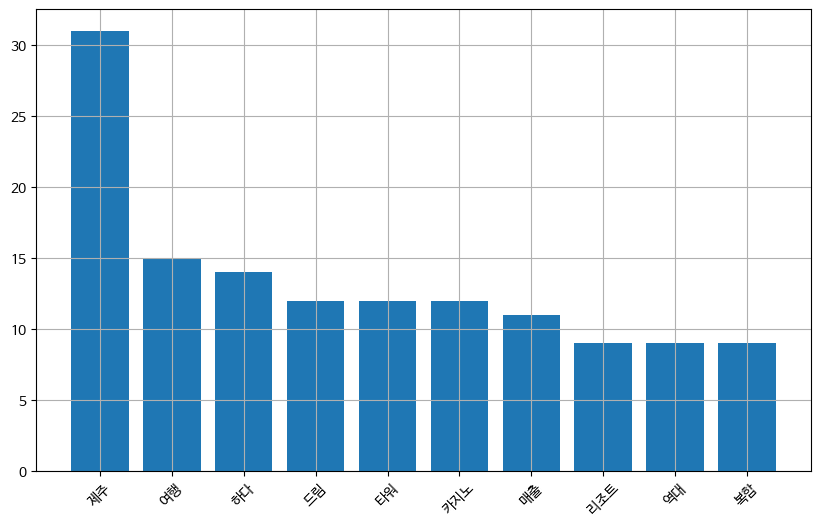

<Figure size 1000x600 with 0 Axes>

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 기사제목을 토큰화
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'{PATH}/{srcText}_bar_graph.png')


# 기사제목을 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(df['제목'].to_list())

# 단어(토큰) 빈도 수_Bar그래프 그리기 : 상위 10개
draw_wordTokenCountGraph(feature_name[:10], count[:10])

#### 워드 클라우드로 만들기

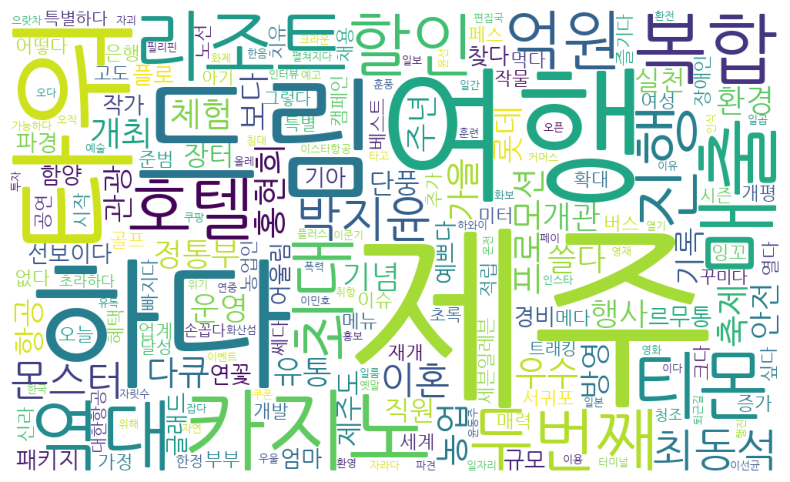

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 한글 폰트 경로를 설정
font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  (#코랩)
# font_path = 'malgun'  # C:/Windows/Fonts/   #(window에서)
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(feature_name, count))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file(f'{PATH}/{srcText}_워드클라우드.png')



---



## 03.웹 이미지 수집하기

### # 1. 웹 이미지 화면에 출력하기

In [41]:
from IPython.display import Image
Image(url='https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg')

### # 2.  웹 이미지 파일로 저장하기

In [42]:
import requests
from io import BytesIO
from PIL import Image

# 다운받을 이미지 url
urls = [
    "https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg",
    "https://shopping-phinf.pstatic.net/main_3726611/37266116619.20230119071117.jpg"
]
# 파일로 저장하기
for idx, url in enumerate(urls):
    res = requests.get(url)                   # url 요청
    img = Image.open(BytesIO(res.content))    # 응답결과(res.content)바이트파일 이미지 파일로 오픈
    img.save(f'./testimg_{idx}.png', 'png')   # 'png'이미지로(만) 저장

### [실습] : 웹 이미지 수집하기
- 앞에서 저장한 쇼핑 목록에 있는 URL을 이용하여 이미지 저장하기

In [44]:
# 이미지 다운로드 하기
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import time
import os

FILE = f'{PATH}/naver_shop_여성니트.csv'  # 앞에서 자신이 검색한 쇼핑 파일
ImgFolder = f'{PATH}/download/'         # 다운받을 이미지 폴더
MAX = 10                                # 이미지 파일 다운로드 건수

def getImageUrl(file):
    print(f'읽은 파일명: {file}')
    df = pd.read_csv(file, encoding='utf-8') # 이미지가 있는 쇼핑 파일 불러오기
    return df['이미지'].to_list()

def createDirectory(directory): # 다운받을 이미지 폴더 만들기
    try:
        if not os.path.exists(directory):
            print(f'{directory} 폴더가 생성되었습니다.')
            os.makedirs(directory)
        print(f'이미지 폴더 위치 : {directory}')
    except OSError:
        print("Error: Failed to create the directory.")

def downloadImageFile(urls, imgfolder):
    start = time.time()             # 이미지 다운로드 속도 time check
    for idx, url in enumerate(urls):
        if idx == MAX:
            break  # MAX 건수만 처리하기
        res = requests.get(url)     # request.get 요청
#         print(f'[{idx+1:2>}][{time.time() - start}] : {url}')  # 이미지 다운로드 시간 체크
        print(f'[{idx+1:0>2}] : {url}')  # 이미지 다운로드 시간 체크
        img = Image.open(BytesIO(res.content))  #Img open
        img.save(f'{imgfolder}testimage_{idx}.png', 'png')
    return idx


urls = getImageUrl(FILE)                # 이미지 URL 목록 가져오기
createDirectory(ImgFolder)              # 다운받을 이미지 폴더 만들기
totalcnt = downloadImageFile(urls, ImgFolder)      # 이미지 다운로드하기
print(f'총 다운로드 건수: {totalcnt}')


읽은 파일명: ./sample_data/naver_shop_여성니트.csv
이미지 폴더 위치 : ./sample_data/download/
[01] : https://shopping-phinf.pstatic.net/main_8110549/81105494642.jpg
[02] : https://shopping-phinf.pstatic.net/main_8201676/82016764964.15.jpg
[03] : https://shopping-phinf.pstatic.net/main_8227052/82270521487.3.jpg
[04] : https://shopping-phinf.pstatic.net/main_4239133/42391336405.20231014071141.jpg
[05] : https://shopping-phinf.pstatic.net/main_4293542/42935424399.20230929131523.jpg
[06] : https://shopping-phinf.pstatic.net/main_8201675/82016750293.1.jpg
[07] : https://shopping-phinf.pstatic.net/main_1065955/10659550627.5.jpg
[08] : https://shopping-phinf.pstatic.net/main_8223769/82237690733.jpg
[09] : https://shopping-phinf.pstatic.net/main_4189969/41899691388.20230817034832.jpg
[10] : https://shopping-phinf.pstatic.net/main_8339525/83395253385.5.jpg
총 다운로드 건수: 10


---------------------------

끝!